
# Logistic Regression



In [98]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

# A. Hand-written digits classification 


Loading the digits data set

In [99]:
digits = ds.load_digits()
digits.images.shape

(1797, 8, 8)

Let's plot a few of these:

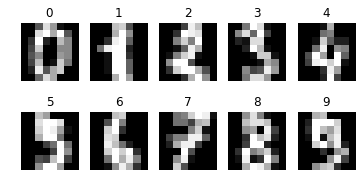

In [100]:
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3))

for i in range(nrows):
    for j in range(ncols):
        k = j + i * ncols
        ax = axes[i, j]
        ax.imshow(digits.images[k, ...], cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title(digits.target[k])

## Classification on Digits
Let's try a classification task on the digits. The first thing we'll want to do is split the digits into a training and testing sample:

In [101]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


Create the LogisticRegression model from sklean.linear_model and train your model

In [102]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


We can check our classfication accuracy using model score.

In [103]:
clf.score(Xtest, ytest)

0.9555555555555556

Pick one image data (ex, 18th test sample) from the testset and perform the predition.  

Show the predicted result, the ground truth, and the image.

Predicted Result : 9
Ground Truth: 9


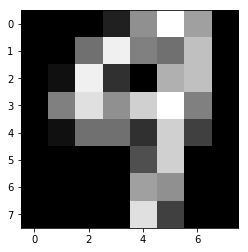

In [104]:
test_sample = Xtest[15]
plt.imshow(test_sample.reshape(8,8), cmap=plt.cm.gray)
print('Predicted Result : %d' % clf.predict(test_sample.reshape(1,-1)))
print('Ground Truth: %d' % ytest[15])

Show the more results for verification with title of [predition]/ground truth

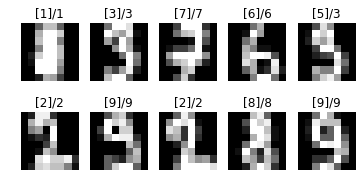

In [105]:
nrows, ncols = 2, 5
starting = 100
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3))

for i in range(10):
    axes[int(i/ncols)][i%ncols].imshow(Xtest[starting+i].reshape(8,8), cmap=plt.cm.gray)
    axes[int(i/ncols)][i%ncols].set_axis_off()
    axes[int(i/ncols)][i%ncols].set_title("%s/%s"%(clf.predict(Xtest[starting+i].reshape(1,-1)), ytest[starting+i]))

# B. Debug:

This single score number doesn't tell us where we've gone wrong: one nice way to do this is to use the confusion matrix

In [106]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[48  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 49  1  0  0  0  0  0  0]
 [ 0  0  0 37  0  1  0  0  0  0]
 [ 0  1  0  0 47  0  0  0  0  0]
 [ 0  2  0  1  0 42  1  0  0  0]
 [ 0  1  0  0  0  0 44  0  1  0]
 [ 0  1  0  1  0  0  0 28  0  1]
 [ 0  4  0  1  0  0  0  0 32  0]
 [ 0  0  0  0  0  1  0  0  2 48]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'predicted')

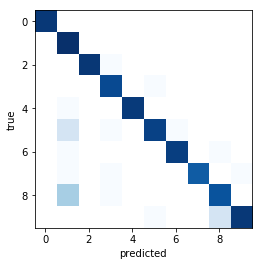

In [107]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap='Blues', interpolation
='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# C. Compare scores, confusion matrix, and prediction results of KNN and Logistic Regression models

In [108]:
import sklearn.neighbors as nb
knc = nb.KNeighborsClassifier()
knc.fit(Xtrain, ytrain)
knc.score(Xtest, ytest)

0.98

In [109]:
ypredK = knc.predict(Xtest)
print(confusion_matrix(ytest, ypredK))

[[48  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  1  0]
 [ 0  1  0  0 46  0  0  1  0  0]
 [ 0  0  0  0  0 45  1  0  0  0]
 [ 0  0  0  0  0  0 45  0  1  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  2  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  1  1  0  0  0 49]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'predicted')

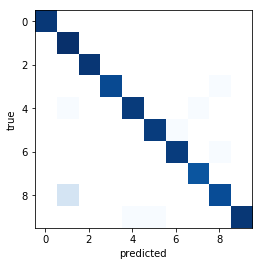

In [110]:
plt.imshow(np.log(confusion_matrix(ytest, ypredK)), cmap='Blues', interpolation
='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

 # D. Test on your own test samples

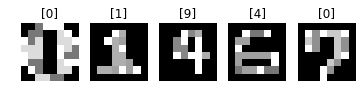

In [111]:
from skimage import io
from PIL import Image

test = []

for x in range (5):
    sample = Image.open('num'+str(x)+'.png').convert('L')
    sample.save('num'+str(x)+'.png')
    test.append(io.imread('num'+str(x)+'.png'))

nrows, ncols = 1, 5  

fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3), squeeze = False)

for i in range(5):
    axes[int(i/ncols)][i%ncols].imshow(test[i].reshape(8,8), cmap=plt.cm.gray)
    axes[int(i/ncols)][i%ncols].set_axis_off()
    axes[int(i/ncols)][i%ncols].set_title("%s"%(clf.predict(test[i].reshape(1,-1))))
    

 # E. Discussion
 Compare the results of KNN and Logistic Regression models.

In [112]:
#Both are around equal in terms of result. KNN, however, has a higher score than Logistics Regression